In [267]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [268]:
df = pd.read_csv('housing.csv')
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [270]:
df = df.dropna()

In [271]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [272]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [273]:
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']
display(X, y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [275]:
train_data = X_train.join(y_train)
display(train_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2952,-119.01,35.34,44.0,1730.0,343.0,782.0,278.0,3.0208,INLAND,63700.0
1937,-120.98,38.66,9.0,2073.0,404.0,916.0,373.0,3.2250,INLAND,163300.0
16198,-121.27,37.96,43.0,1624.0,448.0,1805.0,440.0,1.4250,INLAND,61300.0
20289,-119.17,34.17,21.0,2361.0,464.0,1146.0,396.0,3.6597,NEAR OCEAN,195100.0
7725,-118.11,33.93,17.0,1205.0,347.0,736.0,342.0,3.2011,<1H OCEAN,162500.0
...,...,...,...,...,...,...,...,...,...,...
16426,-121.42,38.22,35.0,1507.0,313.0,868.0,283.0,2.0284,INLAND,96300.0
16910,-122.36,37.56,32.0,4684.0,540.0,1512.0,511.0,15.0001,NEAR OCEAN,500001.0
3008,-119.01,35.28,10.0,7011.0,1453.0,4163.0,1307.0,2.7659,INLAND,77500.0
7416,-118.22,33.94,42.0,1115.0,297.0,1412.0,325.0,3.0903,<1H OCEAN,153500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

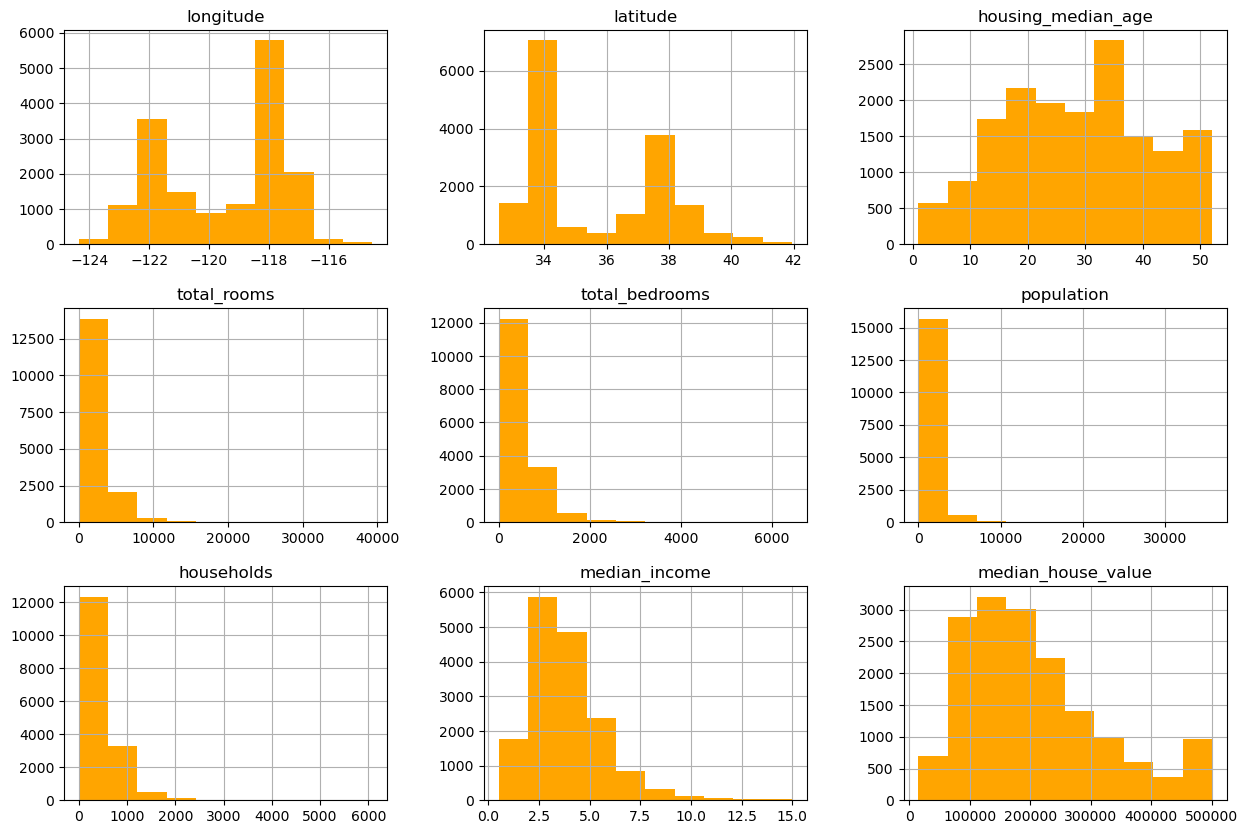

In [276]:
train_data.hist(color = 'orange', figsize=(15,10))

In [277]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

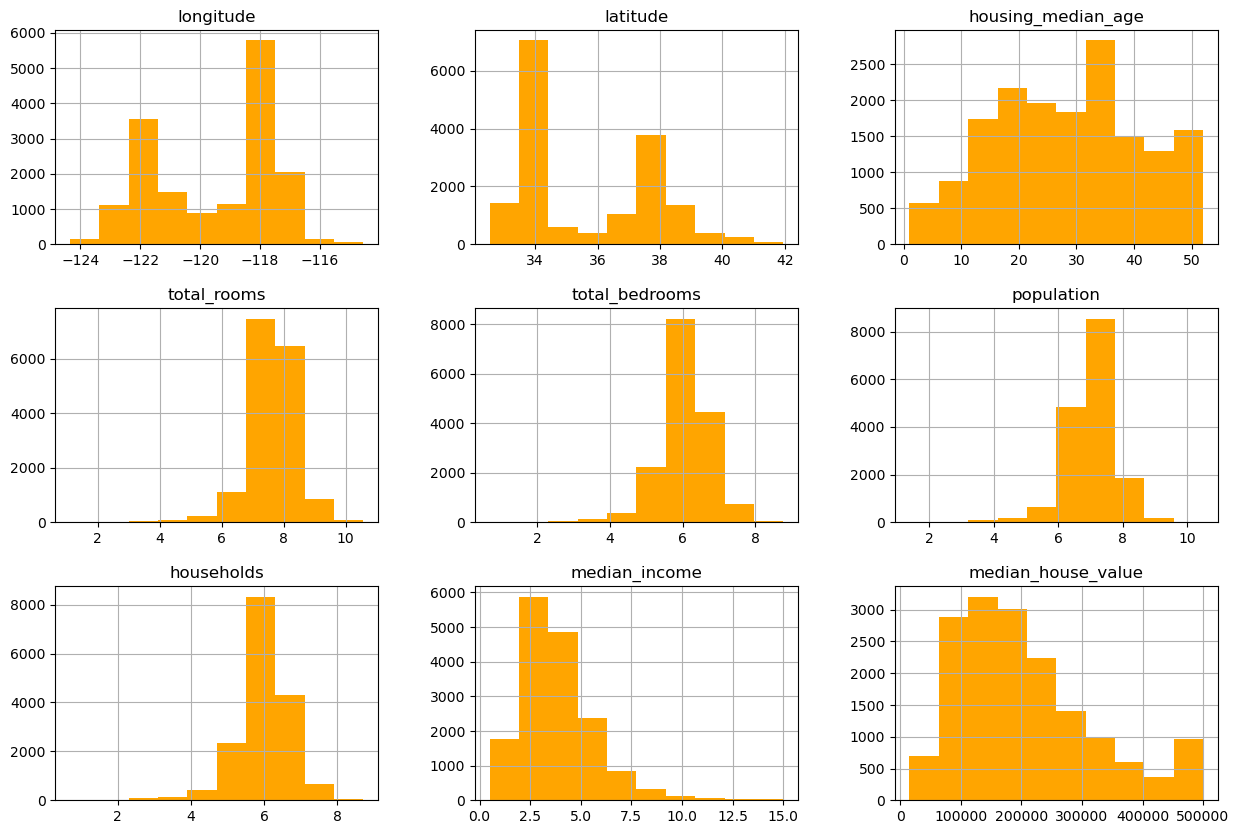

In [278]:
train_data.hist(color = 'orange', figsize=(15,10))

C:\Users\FilipeCampos\AppData\Local\Temp\ipykernel_14340\3333805131.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True)


<Axes: >

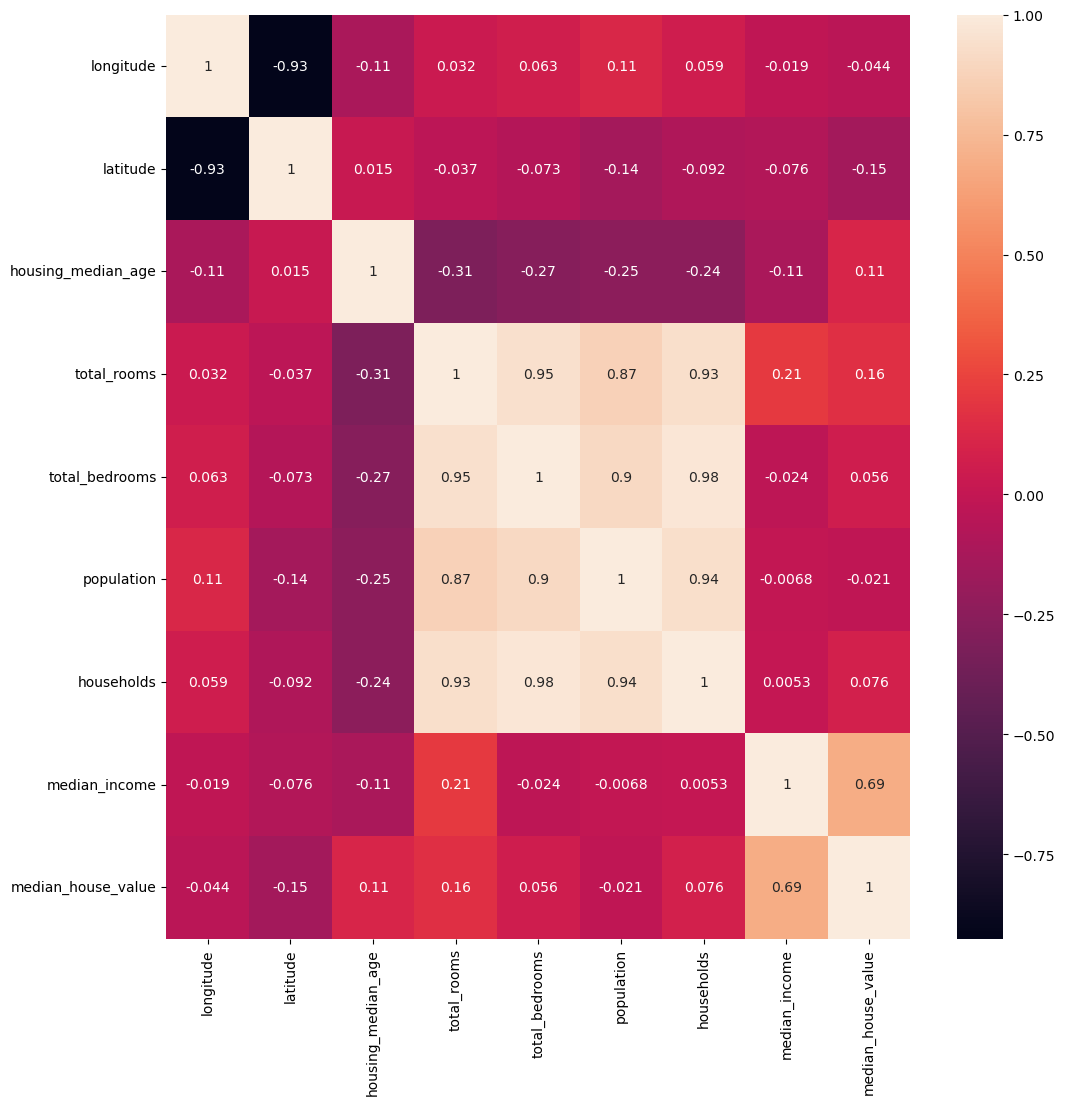

In [279]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), annot = True)


In [280]:
train_data = train_data.join(pd.get_dummies(df['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
display(train_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2952,-119.01,35.34,44.0,7.456455,5.840642,6.663133,5.631212,3.0208,63700.0,0,1,0,0,0
1937,-120.98,38.66,9.0,7.637234,6.003887,6.821107,5.924256,3.2250,163300.0,0,1,0,0,0
16198,-121.27,37.96,43.0,7.393263,6.107023,7.498870,6.089045,1.4250,61300.0,0,1,0,0,0
20289,-119.17,34.17,21.0,7.767264,6.142037,7.044905,5.983936,3.6597,195100.0,0,0,0,0,1
7725,-118.11,33.93,17.0,7.095064,5.852202,6.602588,5.837730,3.2011,162500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,-121.42,38.22,35.0,7.318540,5.749393,6.767343,5.648974,2.0284,96300.0,0,1,0,0,0
16910,-122.36,37.56,32.0,8.452121,6.293419,7.321850,6.238325,15.0001,500001.0,0,0,0,0,1
3008,-119.01,35.28,10.0,8.855378,7.282074,8.334231,7.176255,2.7659,77500.0,0,1,0,0,0
7416,-118.22,33.94,42.0,7.017506,5.697093,7.253470,5.786897,3.0903,153500.0,1,0,0,0,0


<Axes: >

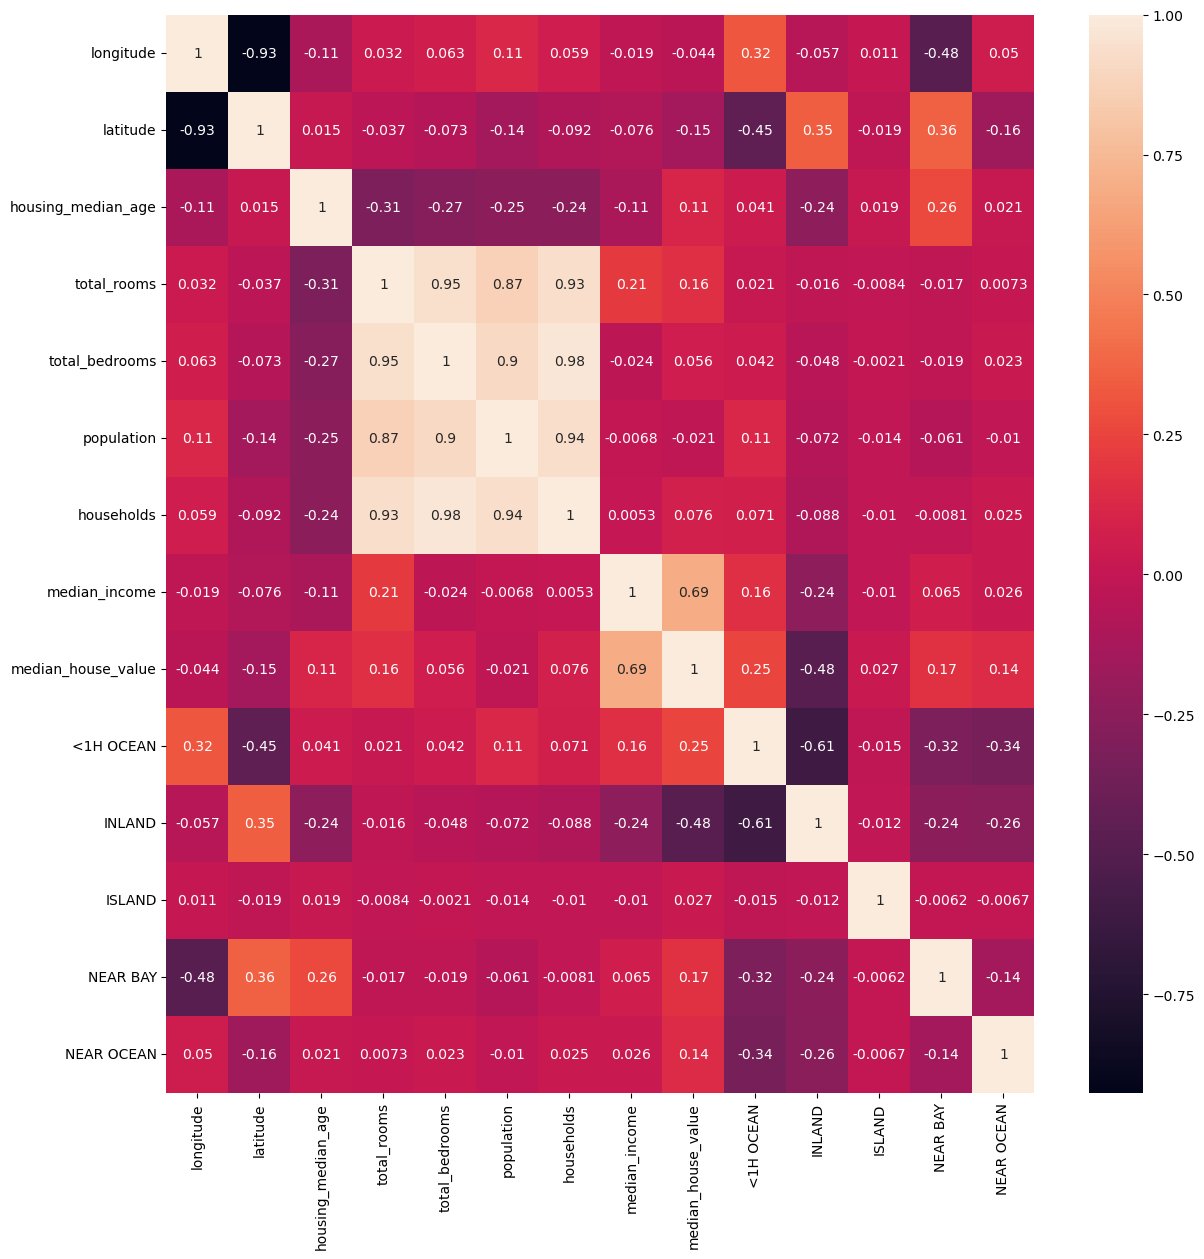

In [281]:
plt.figure(figsize=(14,14))
sns.heatmap(train_data.corr(), annot = True)


<Axes: xlabel='longitude', ylabel='latitude'>

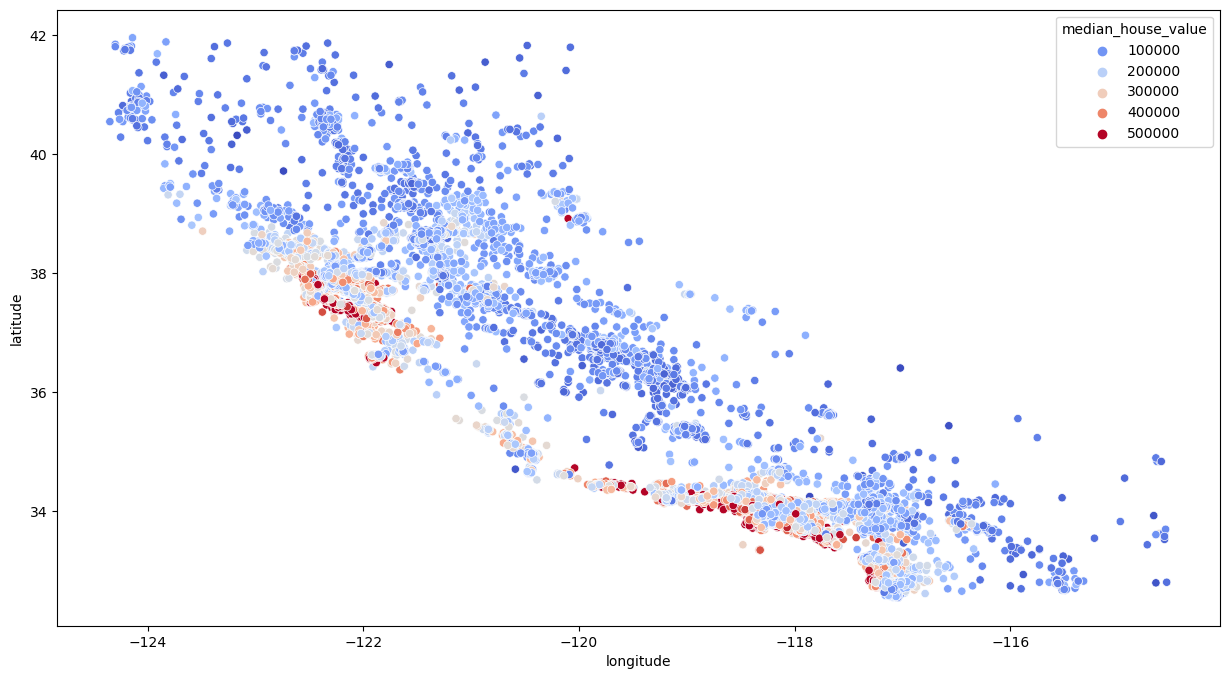

In [282]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'longitude', y= 'latitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [ ]:
import folium
import geopandas as gpd

california_shapefile = 'tl_2019_06_cousub.shp'
california_data = gpd.read_file(california_shapefile)

california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)


folium.GeoJson(data=california_data,name='geojson').add_to(california_map)


california_map.save('california_map.html')  
california_map

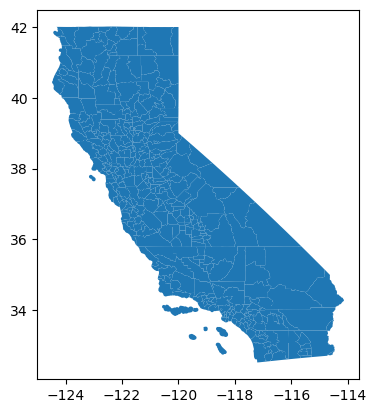

In [284]:
map_data = gpd.read_file('tl_2019_06_cousub.shp')

map_data.plot()
plt.show()


In [285]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] 
display(train_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,household_rooms
2952,-119.01,35.34,44.0,7.456455,5.840642,6.663133,5.631212,3.0208,63700.0,0,1,0,0,0,0.783300,1.324130
1937,-120.98,38.66,9.0,7.637234,6.003887,6.821107,5.924256,3.2250,163300.0,0,1,0,0,0,0.786134,1.289147
16198,-121.27,37.96,43.0,7.393263,6.107023,7.498870,6.089045,1.4250,61300.0,0,1,0,0,0,0.826025,1.214191
20289,-119.17,34.17,21.0,7.767264,6.142037,7.044905,5.983936,3.6597,195100.0,0,0,0,0,1,0.790759,1.298019
7725,-118.11,33.93,17.0,7.095064,5.852202,6.602588,5.837730,3.2011,162500.0,1,0,0,0,0,0.824827,1.215381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,-121.42,38.22,35.0,7.318540,5.749393,6.767343,5.648974,2.0284,96300.0,0,1,0,0,0,0.785593,1.295552
16910,-122.36,37.56,32.0,8.452121,6.293419,7.321850,6.238325,15.0001,500001.0,0,0,0,0,1,0.744596,1.354870
3008,-119.01,35.28,10.0,8.855378,7.282074,8.334231,7.176255,2.7659,77500.0,0,1,0,0,0,0.822333,1.233983
7416,-118.22,33.94,42.0,7.017506,5.697093,7.253470,5.786897,3.0903,153500.0,1,0,0,0,0,0.811840,1.212654


<Axes: >

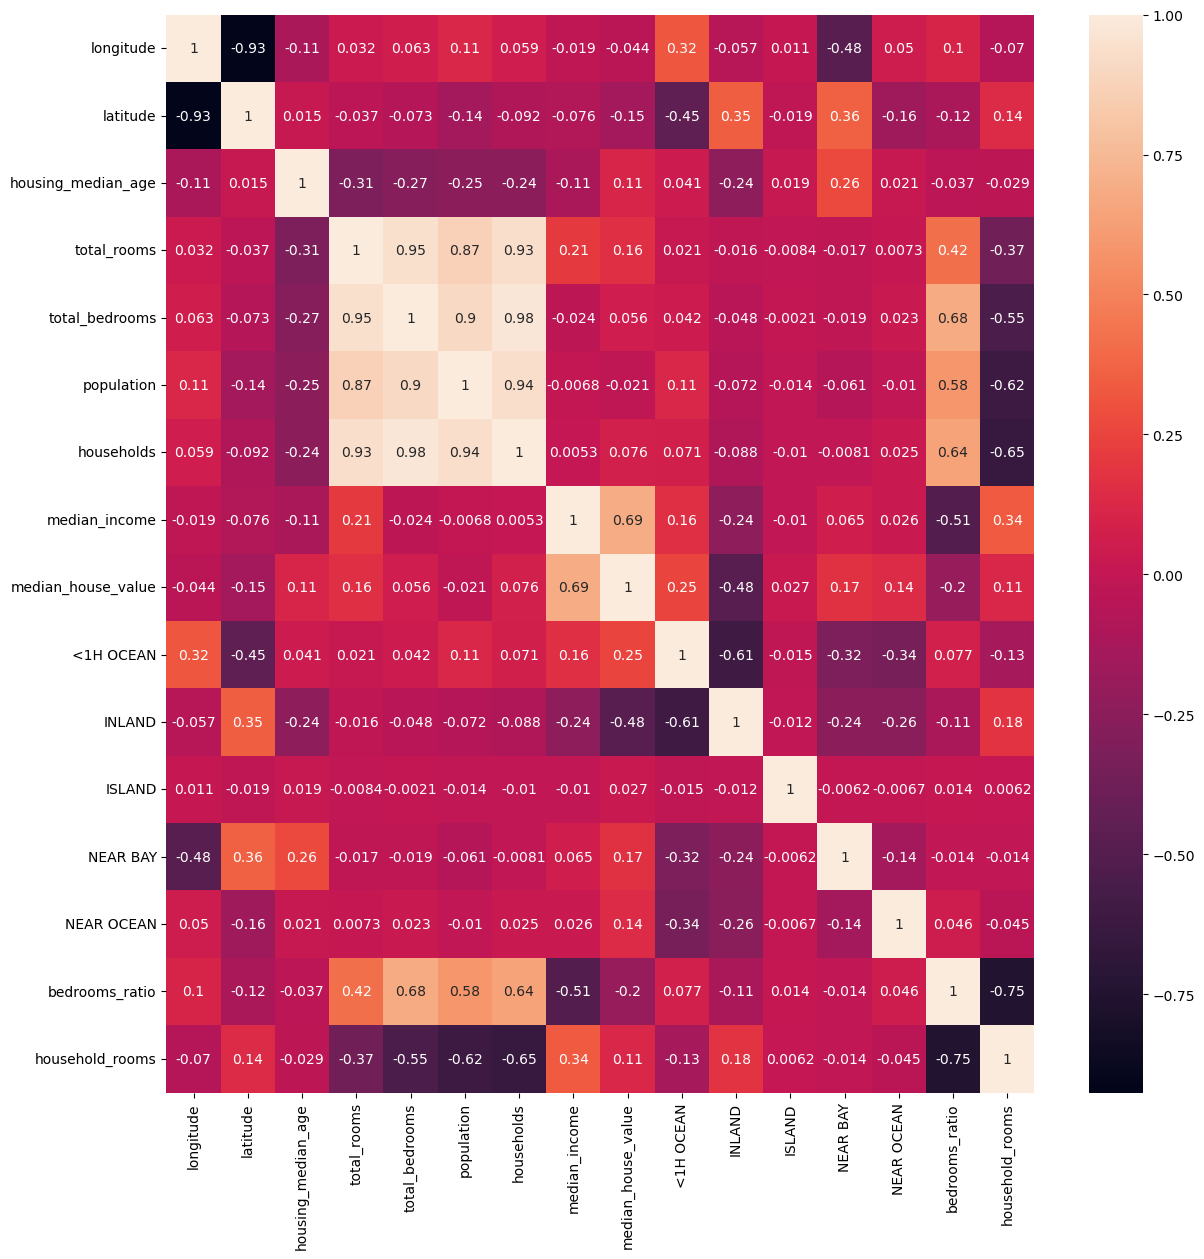

In [286]:
plt.figure(figsize=(14,14))
sns.heatmap(train_data.corr(), annot = True)


In [288]:
from sklearn.linear_model import LinearRegression
X_train , y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

X_train['1H OCEAN'] = X_train['<1H OCEAN']
X_train.drop(columns='<1H OCEAN', inplace=True)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [290]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(df['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households'] 



In [291]:
X_test , y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']
X_test['1H OCEAN'] = X_test['<1H OCEAN']
X_test.drop(columns='<1H OCEAN', inplace=True)

In [292]:
model.score(X_test, y_test)

0.6613379368646001

In [293]:
model_RF = RandomForestRegressor(criterion='squared_error')
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [294]:
model_RF.score(X_test, y_test)

0.8077705549826953

In [300]:
model_XGB = XGBRegressor(n_estimators=100)
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [301]:
model_XGB.score(X_test, y_test)

0.8254843878832488

In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [304]:
models = [model, model_RF, model_XGB]

for i in range(len(models)):
    print(f'{models[i]}:')    
    y_train_pred = models[i].predict(X_train)
    y_test_pred = models[i].predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    

    print('Training MSE:', mse_train)
    print('Validation MSE:', mse_test)
    print('Training MAE:', mae_train)
    print('Validation MAE:', mae_test)
    print('Training R²:', r2_train)
    print('Validation R²:', r2_test)
    print()



LinearRegression():
Training MSE: 4302570568.903151
Validation MSE: 4720361934.327435
Training MAE: 47496.7463990196
Validation MAE: 48913.95545787751
Training R²: 0.6733146950800006
Validation R²: 0.6613379368646001

RandomForestRegressor():
Training MSE: 333813609.50989884
Validation MSE: 2679345145.7649403
Training MAE: 11947.453123088217
Validation MAE: 32918.67095669195
Training R²: 0.9746542214560382
Validation R²: 0.8077705549826953

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
           

In [305]:
print('Scores')
print('LinearRegression',model.score(X_test, y_test))
print('RandomForestRegressor',model_RF.score(X_test, y_test))
print('XGBRegressor',model_XGB.score(X_test, y_test))

Scores
LinearRegression 0.6613379368646001
RandomForestRegressor 0.8077705549826953
XGBRegressor 0.8254843878832488
